# Probability Theory

### Probability vs Statistics

**Probability** - predictions about future events based on models or causes that we assume; ***predicting data***

**Statistics** - analyze data and past events to infer what those models or causes could be; ***using data to predict***

##### Basic Probability

* Probability of Event = $P$
* Probability of a Complimentary Event = $1-P$
* Probability of Composite Independent Events = $\prod{P}$
* The probability of any event must be between $[0, 1]$.

##### Example - Coin Flips

$P(\text{H}) = 0.5$

$P(\text{T}) = 1 - P(\text{H}) = P(\text{not H}) = 0.5$

Across $n$ coin flips, the probability of seeing $n$ heads is $P(\text{H})^n$.


* Probability of Event = $P$
* Probability of a Complimentary Event = $1-P$
* Probability of Composite Independent Events = $\prod{P}$
* The probability of any event must be between $[0, 1]$.

##### Example - Coin Flips

$P(\text{H}) = 0.5$

$P(\text{T}) = 1 - P(\text{H}) = P(\text{not H}) = 0.5$

Across $n$ coin flips, the probability of seeing $n$ heads is $P(\text{H})^n$.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
%matplotlib inline

##### Flipping a Coin

In [2]:
np.random.randint(2, size=10000).mean()

0.4984

In [3]:
np.random.choice([0, 1], size=10000, p=[0.8, 0.2]).mean()

0.1989

##### Two Fair Coin Flips - Percentage of Two Heads?

In [4]:
# 0 is Heads, 1 is Tails
tests = np.random.randint(2, size=(int(1e6), 2))
print(tests[:10])
(tests.sum(axis=1) == 0).mean()

[[1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]]


0.249397

##### Three Fair Coin Flips - Probality Exactly One Head?

In [5]:
tests = np.random.randint(2, size=(int(1e6), 3))
(tests.sum(axis=1) == 2).mean()

0.374748

##### Three Biased Coin Flips - $P(\text{H}) = 0.6 $ - Probability Cxactly One Head?

In [6]:
tests = np.random.choice([0,1], size=(int(1e6), 3), p=[0.6, 0.4])
(tests.sum(axis=1) == 2).mean()

0.288677

##### Die Roll - Probablity of an Even Number?

In [7]:
tests = np.random.randint(6, size=int(1e6))
(tests%2 == 0).mean()

0.499516

##### Two Dice Rolls - Probability of a Double?

In [9]:
start = timer()

tests = np.random.randint(6, size=(int(1e6), 2))
print([np.all(row == row[0]) for row in tests].count(True) / len(tests))
timer() - start

0.166632


4.790470317000654

In [11]:
start = timer()

tests1 = np.random.randint(6, size=int(1e6))
tests2 = np.random.randint(6, size=int(1e6))

(tests1 == tests2).mean()

timer() - start

0.019622327999968547

### Binomial Distribution

(See OneNote notes for further examples as to how we derive the binomial distribution formula.)

The binomial distribution can be used when there are two possible independent outcomes for an event. Examples include coin flips where the outcome is heads or tails, whether a customer buys a produt or not, or whether or not a transaction is fraudulent.

Let $p$ be the probability of a particular outcome, e.g., probability of landing on heads. Let $k$ be the number of times a particular outcome occurs, e.g., number of heads. Then the binomial  distribution is defined as:

$\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}$

The first half keeps track of the total number of ways the particular outcome can occur. For instance, if we flip a coin five times, then the number of possible ways there can be three heads is:

$\frac{5!}{3!2!} = 10$

The second half keeps track of the probability of each of the outcomes. If we continue with the example with a biased coin where $p = 0.8$, then we have:

$(0.8)^3(0.2)^2 = .02048$

Using the binomial distribution formula, the total probability is then $10 * .02048 = 0.2048$.

##### Count the Number of Heads/Tails for 10 Flips, 10000 Times

In [16]:
np.random.binomial(10, 0.5, size=20)

array([7, 3, 4, 5, 5, 5, 6, 5, 4, 5, 5, 7, 5, 7, 5, 4, 5, 5, 4, 3])

In [13]:
np.random.binomial(n=10, p=0.5, size=10000).mean()

5.007

(array([  14.,   98.,  449., 1144., 2066., 2464., 2028., 1169.,  452.,
         116.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

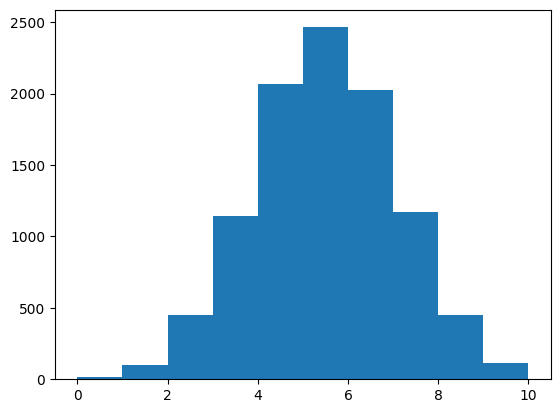

In [14]:
plt.hist(np.random.binomial(n=10, p=0.5, size=10000))

(array([1.00000e+01, 9.03000e+02, 1.67790e+04, 1.18003e+05, 3.24633e+05,
        3.56062e+05, 1.55247e+05, 2.66020e+04, 1.71900e+03, 4.20000e+01]),
 array([25. , 29.9, 34.8, 39.7, 44.6, 49.5, 54.4, 59.3, 64.2, 69.1, 74. ]),
 <BarContainer object of 10 artists>)

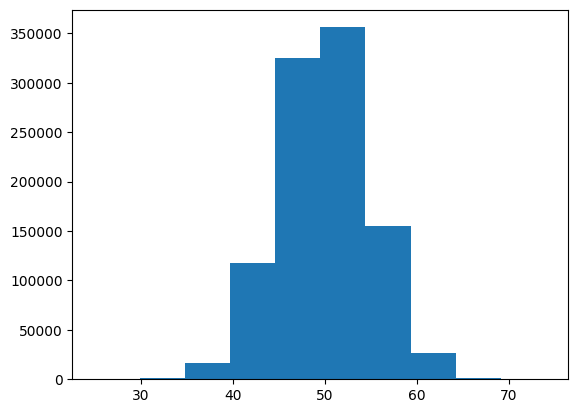

In [15]:
plt.hist(np.random.binomial(n=100, p=0.5, size=int(1e6)))

##### Five Fair Coin Flips - One Head

In [24]:
(np.random.binomial(n=5, p=0.5, size=int(1e6)) == 1).mean()

0.156296

##### Ten Fair Coin Flips - Four Heads

In [25]:
(np.random.binomial(n=10, p=0.5, size=int(1e6)) == 4).mean()

0.205291

##### Five Biased Coin Flips - Five Heads

In [33]:
(np.random.binomial(n=5, p=0.8, size=int(1e6)) == 5).mean()

0.327156

##### Ten Biased Coin Flips - At least 3 Heads

In [34]:
(np.random.binomial(n=10, p=0.15, size=int(1e6)) >= 3).mean()

0.180337

### Conditional Probability

When the outcome of one event depends on an earlier event, we must use conditional probabilities.

$P(A|B) = \frac{P(A \cap B)}{P(B)}$

where $|$ is read as *given* and $\cap$ represents *and*. So the above would read, "The probability of $A$ given $B$ is the probability of $A$ and $B$ divided by the probability of $B$."

$P(\text{positive} | \text{disease}) = \frac{P(\text{positive} \cap \text{disease})}{P(\text{disease})}$

$\text{posterior} = \frac{\text{joint}}{\text{prior}}$

In the OneNote examples, we rearranged the above to compute

$P(\text{positive} \cap \text{disease}) = P(\text{positive} | \text{disease})P(\text{disease})$


### Bayes Rule

Imagine we have a variable we care about that is hidden, meaning it cannot be meausred directly, but that we do have a test. Let's use the example of cancer and test that tests either positive or negative.

The knowledge we come to the problem with is known as our **prior**. In this case, our prior is the prevelance of cancer, where $C$ is our random variable for cancer.

**Prior**:  $P(\text{C})$

Once we begin testing, we begin to obtain evidence that add information to our prior. In this case, positive ($\text{T}_\text{p}$) and negative ($\text{T}_\text{n}$) test results.

**Sensitivity**: $P(\text{T}_\text{p} | \text{C})$ - true positive rate

**Specificity**: $P(\text{T}_\text{n} | \lnot\text{C})$ - true negative rate

Using our prior and our evidence, we can compute joint distributions. We will first compute the joint distribution for positive test cases.

$P(\text{C}, \text{T}_\text{p}) = P(\text{T}_\text{p} | \text{C})P(\text{C})$

$P(\lnot\text{C}, \text{T}_\text{p}) = P(\text{T}_\text{p} | \lnot\text{C})P(\lnot\text{C}) = (1 - P(\text{T}_\text{n}|\lnot\text{C}))(1 - P(\text{C}))$

Once we have our joint distributions, we can compute $P(\text{T}_\text{p})$. Note that the joint distributions are required as the conditional probabilities, $P(\text{T}_\text{p} | \text{C})$ and $P(\text{T}_\text{p} | \lnot\text{C})$ do not consider the prevelance of $C$.

$P(\text{T}_\text{p}) = P(\text{C}, \text{T}_\text{p}) + P(\lnot\text{C}, \text{T}_\text{p})$

We will use this value to normalize our joint distributions and compute our posterior probability distributions. We can think of the joint distributions as portions of a total area defined by $P({\text{T}_\text{p}})$. (See OneNote for example drawing.)

$P(\text{C} | \text{T}_\text{p}) = \frac{P(\text{C}, \text{T}_\text{p})}{P(\text{T}_\text{p})}$

$P(\lnot\text{C} | \text{T}_\text{p}) = \frac{P(\lnot\text{C}, \text{T}_\text{p})}{P(\text{T}_\text{p})}$

To compute the posterior probabilities given negative test results, $P(\text{C}|\text{T}_\text{n})$ and $P(\lnot\text{C}|\text{T}_\text{n})$, we can swap $\text{T}_\text{p}$ and $\text{T}_\text{n}$ in the above algorithm.

### Python Practice

This exercise will use a simulated dataset on cancer test results for patients and whether they really have cancer.

* How many patients are there in total?
* How many patients have cancer?
* How many patients do not have cancer?
* What proportion of patients have cancer?
* What proportion of patients don't have cancer?
* What proportion of patients with cancer test positive?
* What proportion of patients with cancer test negative?
* What proportion of patients without cancer test positive?
* What proportion of patients without cancer test negative?

In [37]:
# Load dataset
df = pd.read_csv('Data/cancer_test_data.csv')
df.head()

,patient_id,test_result,has_cancer
0,79452,Negative,False
1,81667,Positive,True
2,76297,Negative,False
3,36593,Negative,False
4,53717,Negative,False


In [38]:
# Number of Patients
df.shape[0]

2914

In [39]:
# Number of Patients with Cancer
df.has_cancer.sum()

306

In [40]:
# Number of Patients without Cancer
df.shape[0] - df.has_cancer.sum()

2608

In [41]:
# Proportion of Patients with Cancer, P(C)
df.has_cancer.mean()

0.10501029512697323

In [42]:
# Proportion of Patients without Cancer, P(~C)
1 - df.has_cancer.mean()

0.8949897048730268

In [48]:
# Proportion of Patients with Cancer who tested Positive, P(Pos|C)
(df[df.has_cancer]['test_result'] == "Positive").mean()

0.9052287581699346

In [49]:
# Proportion of Patients with Cancer who tested Negative, P(Neg|C)
(df[df.has_cancer]['test_result'] == "Negative").mean()
3

0.09477124183006536

In [50]:
# Proportion of Patients without Cancer who tested Positive, P(Pos|~C)
(df[df.has_cancer == False]['test_result'] == "Positive").mean()

0.2036042944785276

In [51]:
# Proportion of Patients without Cancer who tested Negative, P(Neg|~C)
(df[df.has_cancer == False]['test_result'] == "Negative").mean()

0.7963957055214724

# Test